 # AutoPHoT Example script to highligh basic operations of package 

In [1]:
import autophot

AutoPhOT requires input based on input datalist of parameters
* Many of these are initial guesses and will be changed
* Need to load initial syntax

In [2]:
from autophot.prep_input import load
syntax = load()

Current build of AutoPhOT works of local computer
(Future builds will be accessed via website)
* can give directory of fits file via **fits_dir** or single file via **fname**

In [3]:
from autophot.example import save_example_data

fpath = save_example_data.save_fits_to_desktop()

Succesful copy of example.fits written to:
/Users/seanbrennan/Desktop/autophot_example/example.fits


Single fits file should now be available on desktop. We can now tell autophot what directory to work in

In [4]:
syntax['fits_dir'] = None
syntax['fname'] = fpath
syntax['wdir'] = '/Users/seanbrennan/Desktop'

Early version of code needs so additional paramters to get started

* Catalog version:
    * Currently available: Pan-STARRS, APASS, 2MASS and skymapper
    
* What transient you want to observe:
    * Enter either **target_name** to check TNS or **target_ra/target_dec** to observed specific source 
    
    
First we'll look at the example fits files using some packages from autophot

In [5]:
syntax['catalog'] = 'skymapper'

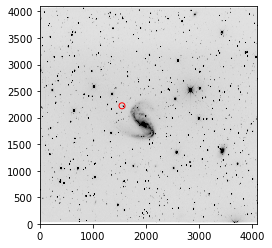

In [8]:
from autophot.packages.functions import getimage
from autophot.packages.functions import getheader

data = getimage(fpath)
header = getheader(fpath)


import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize,SquaredStretch,ZScaleInterval

# Create an ImageNormalize object
norm = ImageNormalize(stretch = SquaredStretch())
vmin,vmax = (ZScaleInterval(nsamples = 1000)).get_limits(data)

plt.imshow(data,
          vmin = vmin,
          vmax = vmax,
          norm = norm,
          origin = 'lower',
          cmap = 'Greys')

# For purpose of this example WCS is already in header 
from astropy import wcs
w = wcs.WCS(header)

# Choose a source in image
from astropy.coordinates import SkyCoord 
c = SkyCoord(113.9724953, -69.5695390, unit="deg")  # defaults to ICRS frame
x_pix,y_pix = w.all_world2pix(c.ra.degree, c.dec.degree, 1)

plt.scatter(x_pix,y_pix,marker = 'o',facecolor = 'none',edgecolor = 'r')

plt.show()

In [9]:
print('Performing photometry on source at ra/dec = %.3f/%.3f' %  (c.ra.degree,c.dec.degree))

syntax['target_ra'] = c.ra.degree
syntax['target_dec'] = c.dec.degree


Performing photometry on source at ra/dec = 113.972/-69.570


In [10]:
from autophot.autophot import run

run(syntax)


    _       _       ___ _  _    _____
   /_\ _  _| |_ ___| _ \ || |__|_   _|
  / _ \ || |  _/ _ \  _/ __ / _ \| |
 /_/ \_\_,_|\__\___/_| |_||_\___/|_|

 ---------------------------------------
         AutoPhOT Beta
         S.J.Brennan et al. 2020
         Please provide feedback/bugs to:
         Email: sean.brennan2@ucdconnect.ie
Checking internet connection...
Connected to internet
> Using directory from input.yml: None
 
Instrument database: /Users/seanbrennan/Desktoptelescope.yml

Number of files: 1
1 telescopes - checking for unique header keywords
 
> Checking: EXAMPLE_TELESCOPE

> Checking: Filters

Files removed - Wrong Image: 0


Files removed - No filter: 0


Files removed - Total: 0


+-------------+
| File: 1 / 1 |
+-------------+

File: example_APT.fits - PID: 10795
Start Time: 2020-06-06 16:48:34.751795
Telescope: EXAMPLE_TELESCOPE
Filter: r
Detecting/removing cosmic ray sources
Cosmic rays removed - image updated
GAIN NOT FOUND - SETTING TO 1
Exposure: 60.0

 --- WCS 

PSF construction source SNR: 9000
Residual table updated: 1 / 6 
PSF construction source SNR: 7507
Residual table updated: 2 / 6 
PSF construction source SNR: 7479
Residual table updated: 3 / 6 
PSF construction source SNR: 7078
Residual table updated: 4 / 6 
PSF construction source SNR: 6573
Residual table updated: 5 / 6 
PSF construction source SNR: 6449
Residual table updated: 6 / 6 
PSF Successful 

Image_radius [pix] : 7.95 +/- 0.316
FWHM PSF: 4.302 
Approx PSF mag -10.29
Image cutout size: (14,14) (14,14)
Fitting PSF to 250 sources

 --- Zeropoint --- 
> zp_r: 22.863 +/- 0.034 < 

 --- Limiting Magnitude --- 
SNR limit cutoff: 5 - Mag error limit: 0.198 
Approx. limiting magnitude: 18.082 
Target photometry performed on original image

 --- Target Photometry --- 
Perforoming PSF Photometry on Target
Fitting PSF to 1 sources
Fitting gaussian to source to get FWHM
Target FWHM: -2.362
Image 1 / 1 saved
SNR = 2 - checking limiting magnitude
Discrepancy in FWHM of 6.7 pixels
Limiting 